**Steps to follow**
1. Univariate Statistical model for forecasting and anomaly detection
2. Univariate Machine learning model\ Deep Learning model for forecasting and anomaly detection
3. Univariate Prophet for forecasting and anomaly detection

Step 1: Univariate Statistical model for forecasting and anomaly detection
links
1. https://michael-fuchs-python.netlify.app/2020/10/27/time-series-analysis-regression-extension-techniques-for-forecasting-univariate-variables/
2. https://reposhub.com/python/learning-tutorial/Apress-hands-on-time-series-analylsis-python.html

In [2]:
!pip install pmdarima

     |████████████████████████████████| 1.4 MB 5.6 MB/s 
     |████████████████████████████████| 9.8 MB 35.7 MB/s 
  Attempting uninstall: statsmodels
    Found existing installation: statsmodels 0.10.2
    Uninstalling statsmodels-0.10.2:
      Successfully uninstalled statsmodels-0.10.2


In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
from statsmodels.tsa.stattools import adfuller
from sklearn import metrics
from pmdarima import auto_arima
from pmdarima.model_selection import train_test_split as time_train_test_split
import tensorflow as tf

In [4]:
import os
from google.colab import drive
drive.mount('/content/drive/')

Mounted at /content/drive/


In [49]:
path = "/content/drive/My Drive/data/realKnownCause/nyc_taxi.xlsx"
data_Taxi = pd.read_excel(path)

In [50]:
data_Taxi_forecasting = data_Taxi[["timestamp","value"]]

In [51]:
data_Taxi_forecasting.head()

,timestamp,value
0,2014-07-01 00:00:00,10844
1,2014-07-01 00:30:00,8127
2,2014-07-01 01:00:00,6210
3,2014-07-01 01:30:00,4656
4,2014-07-01 02:00:00,3820


In [52]:
df_data = data_Taxi["value"]

In [53]:
# plot 
import plotly.express as px
fig = px.line(data_Taxi_forecasting, x="timestamp", y="value", title='NYC Taxi Trips')
fig.update_xaxes(
    rangeslider_visible = True,
)
fig.show()

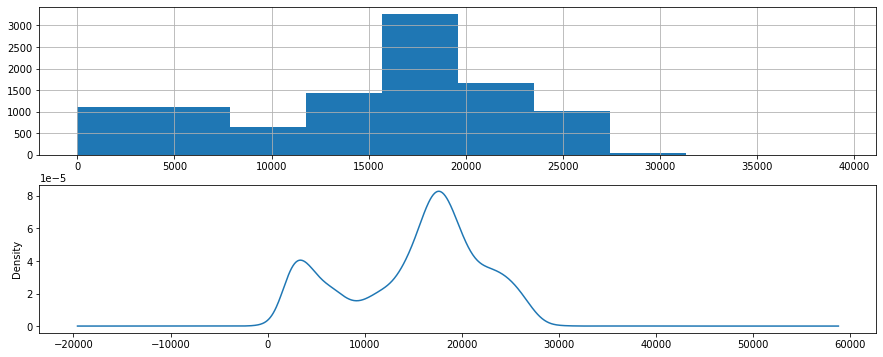

In [54]:
plt.figure(1, figsize=(15,6))
plt.subplot(211)
df_data.hist()
plt.subplot(212)
df_data.plot(kind='kde')
plt.show()

Definition of required functions

In [20]:
def mean_absolute_percentage_error(y_true, y_pred):
    '''
    Calculate the mean absolute percentage error as a metric for evaluation
    
    Args:
        y_true (float64): Y values for the dependent variable (test part), numpy array of floats 
        y_pred (float64): Predicted values for the dependen variable (test parrt), numpy array of floats
    
    Returns:
        Mean absolute percentage error 
    '''    
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

In [19]:
def timeseries_evaluation_metrics_func(y_true, y_pred):
    '''
    Calculate the following evaluation metrics:
        - MSE
        - MAE
        - RMSE
        - MAPE
        - R²
    
    Args:
        y_true (float64): Y values for the dependent variable (test part), numpy array of floats 
        y_pred (float64): Predicted values for the dependen variable (test parrt), numpy array of floats
    
    Returns:
        MSE, MAE, RMSE, MAPE and R² 
    '''    
    print('Evaluation metric results: ')
    print(f'MSE is : {metrics.mean_squared_error(y_true, y_pred)}')
    print(f'MAE is : {metrics.mean_absolute_error(y_true, y_pred)}')
    print(f'RMSE is : {np.sqrt(metrics.mean_squared_error(y_true, y_pred))}')
    print(f'MAPE is : {mean_absolute_percentage_error(y_true, y_pred)}')
    print(f'R2 is : {metrics.r2_score(y_true, y_pred)}',end='\n\n')

In [57]:
def Augmented_Dickey_Fuller_Test_func(series , column_name):
    '''
    Calculates statistical values whether the available data are stationary or not 
    
    Args:
        series (float64): Values of the column for which stationarity is to be checked, numpy array of floats 
        column_name (str): Name of the column for which stationarity is to be checked
    
    Returns:
        p-value that indicates whether the data are stationary or not
    ''' 
    print (f'Results of Dickey-Fuller Test for column: {column_name}')
    dftest = adfuller(series, autolag='AIC')
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','No Lags Used','Number of Observations Used'])
    for key,value in dftest[4].items():
       dfoutput['Critical Value (%s)'%key] = value
    print (dfoutput)
    if dftest[1] <= 0.05:
        print("Conclusion:====>")
        print("Reject the null hypothesis")
        print("Data is stationary")
    else:
        print("Conclusion:====>")
        print("Fail to reject the null hypothesis")
        print("Data is non-stationary")


Check for Stationarity

In [58]:
Augmented_Dickey_Fuller_Test_func(data_Taxi_forecasting["value"],'value')

Results of Dickey-Fuller Test for column: value
Test Statistic                -1.076452e+01
p-value                        2.472132e-19
No Lags Used                   3.900000e+01
Number of Observations Used    1.028000e+04
Critical Value (1%)           -3.430986e+00
Critical Value (5%)           -2.861821e+00
Critical Value (10%)          -2.566920e+00
dtype: float64
Conclusion:====>
Reject the null hypothesis
Data is stationary


In [59]:
X = data_Taxi_forecasting["value"]
trainX, testX = time_train_test_split(X, test_size=30)

In [60]:
stepwise_model = auto_arima(trainX,start_p=1, start_q=1,
                            max_p=7, max_q=7, seasonal = False,
                            d=None, trace=True,error_action='ignore',
                            suppress_warnings=True, stepwise=True)

Performing stepwise search to minimize aic
 ARIMA(1,0,1)(0,0,0)[0]             : AIC=178487.127, Time=3.42 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=229218.966, Time=0.15 sec
 ARIMA(1,0,0)(0,0,0)[0]             : AIC=inf, Time=0.18 sec
 ARIMA(0,0,1)(0,0,0)[0]             : AIC=215908.327, Time=1.89 sec
 ARIMA(2,0,1)(0,0,0)[0]             : AIC=175896.833, Time=1.39 sec
 ARIMA(2,0,0)(0,0,0)[0]             : AIC=175952.602, Time=0.54 sec
 ARIMA(3,0,1)(0,0,0)[0]             : AIC=175543.450, Time=3.96 sec
 ARIMA(3,0,0)(0,0,0)[0]             : AIC=175866.946, Time=0.57 sec
 ARIMA(4,0,1)(0,0,0)[0]             : AIC=175474.068, Time=4.84 sec
 ARIMA(4,0,0)(0,0,0)[0]             : AIC=175562.665, Time=0.70 sec
 ARIMA(5,0,1)(0,0,0)[0]             : AIC=175462.695, Time=6.02 sec
 ARIMA(5,0,0)(0,0,0)[0]             : AIC=175547.526, Time=0.84 sec
 ARIMA(6,0,1)(0,0,0)[0]             : AIC=175433.144, Time=6.25 sec
 ARIMA(6,0,0)(0,0,0)[0]             : AIC=175501.740, Time=1.36 sec
 ARIMA(7,0,1

In [61]:
forecast, conf_int = stepwise_model.predict(n_periods=len(testX), return_conf_int=True)
forecast = pd.DataFrame(forecast,columns=['close_pred'])

In [62]:
df_conf = pd.DataFrame(conf_int,columns= ['Upper_bound','Lower_bound'])
df_conf["new_index"] = range(0, len(testX))
df_conf = df_conf.set_index("new_index")
df_conf.head()

,Upper_bound,Lower_bound
new_index,,
0,12108.755216,16668.268857
1,12749.388562,21114.653129
2,12308.131391,24543.952536
3,12105.640669,27531.559938
4,11457.960293,29592.284567


In [63]:
timeseries_evaluation_metrics_func(testX, forecast)

Evaluation metric results: 
MSE is : 69459182.15133774
MAE is : 6385.348135093771
RMSE is : 8334.217548836708
MAPE is : 28.182315268940343
R2 is : -5.446214855699368



In [64]:
len(testX)

30

In [65]:
forecast["new_index"] = range(0, len(testX))
forecast = forecast.set_index("new_index")

In [66]:
testX_df = pd.DataFrame(testX)
testX_df["new_index"]= range(0, len(testX))
testX_df = testX_df.set_index("new_index")

In [67]:
testX_df.head()

,value
new_index,
0,13522
1,18164
2,17645
3,20056
4,20270


In [68]:
# compare actual and predicted values
comparison = pd.concat([forecast, testX_df], axis=1)

In [69]:
comparison.drop(comparison.tail(1).index,inplace=True)

In [70]:
comparison.tail()

,close_pred,value
new_index,,
24,12972.588824,23719
25,13081.503740,24670
26,13260.637593,25721
27,13496.250874,27309
28,13772.507347,26591


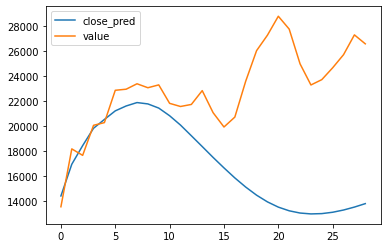

In [71]:
# plot lines
plt.plot(comparison.index.values, comparison["close_pred"], label = "close_pred")
plt.plot(comparison.index.values, comparison["value"], label = "value")
plt.legend()
plt.show()

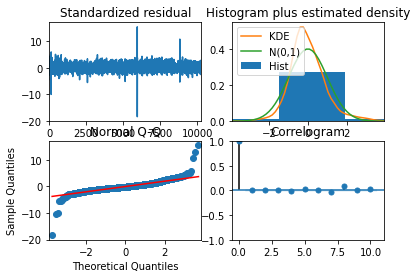

In [72]:
stepwise_model.plot_diagnostics();

SARIMA

In [27]:
testX_df = pd.DataFrame(testX)
testX_df["new_index"]= range(0, len(testX))
testX_df = testX_df.set_index("new_index")

In [1]:
df_results_SARIMA = pd.DataFrame()


for m in  [6]:
    print("="*100)
    print(f' Fitting SARIMA for Seasonal value m = {str(m)}')
    stepwise_model = auto_arima(trainX, start_p=1, start_q=1,
                                max_p=7, max_q=7, seasonal=True, start_P=1, 
                                start_Q=1, max_P=7, max_D=7, max_Q=7, m=m,
                                d=None, D=None, trace=True, error_action='ignore', 
                                suppress_warnings=True, stepwise=True)

    print(f'Model summary for  m = {str(m)}')
    print("-"*100)
    stepwise_model.summary()

    forecast ,conf_int= stepwise_model.predict(n_periods=len(testX),return_conf_int=True)
    df_conf = pd.DataFrame(conf_int,columns= ['Upper_bound','Lower_bound'])
    df_conf["new_index"] = range(0, len(testX))
    df_conf = df_conf.set_index("new_index")
    forecast = pd.DataFrame(forecast, columns=['close_pred'])
    forecast["new_index"] = range(0, len(testX))
    forecast = forecast.set_index("new_index")

    timeseries_evaluation_metrics_func(testX, forecast)
    
    
    # Storage of m value for each model in a separate table 
    rmse = np.sqrt(metrics.mean_squared_error(testX, forecast))    
    df1 = {'m':m, 'RMSE': rmse}
    df_results_SARIMA = df_results_SARIMA.append(df1, ignore_index=True)

    comparison = pd.concat([forecast, testX_df], axis=1)
    print("***************************************")
    #print(comparison)
    comparison.drop(comparison.tail(1).index,inplace=True)


    plt.plot(comparison.index.values, comparison["close_pred"], label = "close_pred")
    plt.plot(comparison.index.values, comparison["value"], label = "value")
    plt.legend()
    plt.show()
    
    #plt.rcParams["figure.figsize"] = [15, 7]
    #plt.plot(trainX, label='Train ')
    #plt.plot(testX, label='Test ')
    #plt.plot(forecast, label=f'Predicted with m={str(m)} ')
    #plt.plot(df_conf['Upper_bound'], label='Confidence Interval Upper bound ')
    #plt.plot(testX, label='Confidence Interval Lower bound ')
    #plt.legend(loc='best')
    #plt.show()
    
    print("-"*100)

NameError: ignored

***LSTM***
1. https://michael-fuchs-python.netlify.app/2020/11/01/time-series-analysis-neural-networks-for-forecasting-univariate-variables/
2. https://towardsdatascience.com/lstm-autoencoder-for-extreme-rare-event-classification-in-keras-ce209a224cfb
3. https://machinelearningmastery.com/how-to-develop-lstm-models-for-time-series-forecasting/
4. https://towardsdatascience.com/lstm-framework-for-univariate-time-series-prediction-d9e7252699e
5. https://machinelearningmastery.com/reshape-input-data-long-short-term-memory-networks-keras/
6. https://machinelearningmastery.com/how-to-develop-deep-learning-models-for-univariate-time-series-forecasting/

In [73]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn import metrics
import tensorflow as tf
from sklearn import preprocessing
from keras.models import Sequential
from keras.layers import LSTM
from keras.layers import Dense
from numpy import array

In [74]:
import os
from google.colab import drive
drive.mount('/content/drive/')

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


In [75]:
path = "/content/drive/My Drive/data/realKnownCause/nyc_taxi.xlsx"
data_Taxi = pd.read_excel(path)

In [76]:
data_Taxi_forecasting = data_Taxi[["timestamp","value"]]

In [77]:
data_Taxi_forecasting.set_index('timestamp', inplace=True)

In [78]:
data_Taxi_forecasting

,value
timestamp,
2014-07-01 00:00:00,10844
2014-07-01 00:30:00,8127
2014-07-01 01:00:00,6210
2014-07-01 01:30:00,4656
2014-07-01 02:00:00,3820
...,...
2015-01-31 21:30:00,24670
2015-01-31 22:00:00,25721
2015-01-31 22:30:00,27309


In [79]:
# split a univariate sequence into samples
def split_sequence(sequence, n_steps):
	X, y = list(), list()
	for i in range(len(sequence)):
		# find the end of this pattern
		end_ix = i + n_steps
		# check if we are beyond the sequence
		if end_ix > len(sequence)-1:
			break
		# gather input and output parts of the pattern
		seq_x, seq_y = sequence[i:end_ix], sequence[end_ix]
		X.append(seq_x)
		y.append(seq_y)
	return array(X), array(y)

In [80]:
n_steps = 7
n_features = 1

In [81]:
# vanilla LSTM (with single LSTM layer)
...
# define model
model = Sequential()
model.add(LSTM(50, activation='relu', input_shape=(n_steps, n_features)))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mse')

In [82]:
df_values = data_Taxi_forecasting["value"]
trainX, testX = time_train_test_split(df_values, test_size=30)

In [83]:
type(trainX)

pandas.core.series.Series

In [84]:
#uni_data = data_Taxi_forecasting["value"].values
X, Y = split_sequence(trainX, 7)

In [85]:
X = X.reshape((X.shape[0], X.shape[1], n_features))

In [86]:
model.fit(X, Y, epochs=100, verbose=1)

Epoch 1/100
322/322 [==============================] - 12s 27ms/step - loss: 18731350.0000
Epoch 2/100
322/322 [==============================] - 8s 26ms/step - loss: 7317438.0000
Epoch 3/100
322/322 [==============================] - 8s 26ms/step - loss: 5971528.0000
Epoch 4/100
322/322 [==============================] - 8s 26ms/step - loss: 5234588.5000
Epoch 5/100
322/322 [==============================] - 8s 26ms/step - loss: 5953827.5000
Epoch 6/100
322/322 [==============================] - 9s 27ms/step - loss: 6065440.0000
Epoch 7/100
322/322 [==============================] - 8s 26ms/step - loss: 3660401.2500
Epoch 8/100
322/322 [==============================] - 8s 26ms/step - loss: 3571861.0000
Epoch 9/100
322/322 [==============================] - 9s 26ms/step - loss: 3558072.7500
Epoch 10/100
322/322 [==============================] - 8s 26ms/step - loss: 2941299.2500
Epoch 11/100
322/322 [==============================] - 8s 25ms/step - loss: 2433665.0000
Epoch 12/100
322/

In [87]:
x_input = X[-1]
type(x_input)

numpy.ndarray

In [88]:
input_sample = []
for i in x_input:
  print(i)
  input_sample.append(i[0])

[3683]
[3329]
[3714]
[4531]
[4803]
[7049]
[8363]


In [89]:
input_sample

[3683, 3329, 3714, 4531, 4803, 7049, 8363]

In [ ]:
# demonstrate prediction for next 10 days
#x_input = array(x_input)
temp_input= input_sample   #list(x_input)
lst_output=[]
i=0
while(i<30):
    
    if(len(temp_input)>7):
        x_input=array(temp_input[1:])
        print("{} day input {}".format(i,x_input))
        #print(x_input)
        x_input = x_input.reshape((1, n_steps, n_features))
        #print(x_input)
        yhat = model.predict(x_input, verbose=0)
        print("{} day output {}".format(i,yhat))
        temp_input.append(yhat[0][0])
        temp_input=temp_input[1:]
        #print(temp_input)
        lst_output.append(yhat[0][0])
        i=i+1
    else:
        x_input = x_input.reshape((1, n_steps, n_features))
        yhat = model.predict(x_input, verbose=0)
        print(yhat[0])
        temp_input.append(yhat[0][0])
        lst_output.append(yhat[0][0])
        i=i+1
    

print(lst_output)

In [91]:
df_results = pd.DataFrame(testX)

In [92]:
df_results["predicted"] = lst_output

In [ ]:
df_results

In [94]:
df_results["new_index"]= range(0, len(testX))


In [ ]:
df_results

In [96]:
df_results = df_results.set_index("new_index")

In [ ]:
df_results

comparison of predicted and actual values

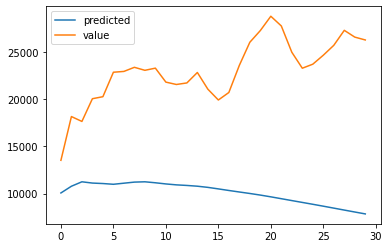

In [98]:
# plot lines
plt.plot(df_results.index.values, df_results["predicted"], label = "predicted")
plt.plot(df_results.index.values, df_results["value"], label = "value")
plt.legend()
plt.show()

In [99]:
timeseries_evaluation_metrics_func(df_results["value"], df_results["predicted"])

Evaluation metric results: 
MSE is : 183609276.29279745
MAE is : 12950.802945963542
RMSE is : 13550.250045397592
MAPE is : 54.799908055309
R2 is : -16.04000547982331



**Stacked LSTM**

In [100]:
# define model
model2 = Sequential()
model2.add(LSTM(50, activation='relu', return_sequences=True, input_shape=(n_steps, n_features)))
model2.add(LSTM(50, activation='relu'))
model2.add(Dense(1))
model2.compile(optimizer='adam', loss='mse')

In [101]:
model2.fit(X, Y, epochs=100, verbose=1)

Epoch 1/100
322/322 [==============================] - 23s 65ms/step - loss: 17735186.0000
Epoch 2/100
322/322 [==============================] - 17s 54ms/step - loss: 13190958.0000
Epoch 3/100
322/322 [==============================] - 17s 54ms/step - loss: 9620517.0000
Epoch 4/100
322/322 [==============================] - 17s 52ms/step - loss: 7168091.5000
Epoch 5/100
322/322 [==============================] - 17s 54ms/step - loss: 14048267.0000
Epoch 6/100
322/322 [==============================] - 17s 53ms/step - loss: 7694347.5000
Epoch 7/100
322/322 [==============================] - 17s 52ms/step - loss: 21473912.0000
Epoch 8/100
322/322 [==============================] - 16s 51ms/step - loss: 11615725.0000
Epoch 9/100
322/322 [==============================] - 17s 53ms/step - loss: 9450628.0000
Epoch 10/100
322/322 [==============================] - 17s 53ms/step - loss: 8098986.5000
Epoch 11/100
322/322 [==============================] - 17s 52ms/step - loss: 7131641.5000
Epo

In [102]:
x_input = X[-1]
type(x_input)

numpy.ndarray

In [ ]:
input_sample = []
for i in x_input:
  print(i)
  input_sample.append(i[0])

In [104]:
input_sample

[3683, 3329, 3714, 4531, 4803, 7049, 8363]

In [105]:
# demonstrate prediction for next 10 days
#x_input = array(x_input)
temp_input= input_sample   #list(x_input)
lst_output=[]
i=0
while(i<30):
    
    if(len(temp_input)>7):
        x_input=array(temp_input[1:])
        print("{} day input {}".format(i,x_input))
        #print(x_input)
        x_input = x_input.reshape((1, n_steps, n_features))
        #print(x_input)
        yhat = model2.predict(x_input, verbose=0)
        print("{} day output {}".format(i,yhat))
        temp_input.append(yhat[0][0])
        temp_input=temp_input[1:]
        #print(temp_input)
        lst_output.append(yhat[0][0])
        i=i+1
    else:
        x_input = x_input.reshape((1, n_steps, n_features))
        yhat = model2.predict(x_input, verbose=0)
        print(yhat[0])
        temp_input.append(yhat[0][0])
        lst_output.append(yhat[0][0])
        i=i+1
    

print(lst_output)

[10439.558]
1 day input [ 3329.          3714.          4531.          4803.
  7049.          8363.         10439.55761719]
1 day output [[11888.902]]
2 day input [ 3714.          4531.          4803.          7049.
  8363.         10439.55761719 11888.90234375]
2 day output [[13224.027]]
3 day input [ 4531.          4803.          7049.          8363.
 10439.55761719 11888.90234375 13224.02734375]
3 day output [[13949.185]]
4 day input [ 4803.          7049.          8363.         10439.55761719
 11888.90234375 13224.02734375 13949.18457031]
4 day output [[14895.278]]
5 day input [ 7049.          8363.         10439.55761719 11888.90234375
 13224.02734375 13949.18457031 14895.27832031]
5 day output [[15504.609]]
6 day input [ 8363.         10439.55761719 11888.90234375 13224.02734375
 13949.18457031 14895.27832031 15504.609375  ]
6 day output [[16191.283]]
7 day input [10439.558 11888.902 13224.027 13949.185 14895.278 15504.609 16191.283]
7 day output [[16606.568]]
8 day input [11888.

In [106]:
df_results = pd.DataFrame(testX)

In [107]:
df_results["predicted"] = lst_output

In [ ]:
df_results

In [109]:
df_results["new_index"]= range(0, len(testX))
df_results = df_results.set_index("new_index")


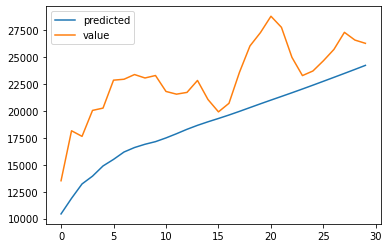

In [110]:
# plot lines
plt.plot(df_results.index.values, df_results["predicted"], label = "predicted")
plt.plot(df_results.index.values, df_results["value"], label = "value")
plt.legend()
plt.show()

In [111]:
timeseries_evaluation_metrics_func(df_results["value"], df_results["predicted"])

Evaluation metric results: 
MSE is : 22183509.05990165
MAE is : 4231.51708984375
RMSE is : 4709.93726708771
MAPE is : 18.591522904841703
R2 is : -1.0587582695965483



Bidirectional LSTM

In [112]:
from keras.layers import Bidirectional
model3 = Sequential()
model3.add(Bidirectional(LSTM(50, activation='relu'), input_shape=(n_steps, n_features)))
model3.add(Dense(1))
model3.compile(optimizer='adam', loss='mse')

In [113]:
model3.fit(X, Y, epochs=100, verbose=1)

Epoch 1/100
322/322 [==============================] - 37s 104ms/step - loss: 44994952.0000
Epoch 2/100
322/322 [==============================] - 17s 54ms/step - loss: 6945163.0000
Epoch 3/100
322/322 [==============================] - 18s 54ms/step - loss: 4510444.5000
Epoch 4/100
322/322 [==============================] - 17s 54ms/step - loss: 3181624.5000
Epoch 5/100
322/322 [==============================] - 17s 54ms/step - loss: 2770431.2500
Epoch 6/100
322/322 [==============================] - 18s 56ms/step - loss: 2797757.0000
Epoch 7/100
322/322 [==============================] - 17s 53ms/step - loss: 2536946.0000
Epoch 8/100
322/322 [==============================] - 17s 54ms/step - loss: 2400192.7500
Epoch 9/100
322/322 [==============================] - 18s 57ms/step - loss: 2363322.7500
Epoch 10/100
322/322 [==============================] - 17s 54ms/step - loss: 2352844.0000
Epoch 11/100
322/322 [==============================] - 18s 55ms/step - loss: 2179564.5000
Epoch 

In [114]:
x_input = X[-1]
x_input

array([[3683],
       [3329],
       [3714],
       [4531],
       [4803],
       [7049],
       [8363]])

In [115]:
input_sample = []
for i in x_input:
  print(i)
  input_sample.append(i[0])

[3683]
[3329]
[3714]
[4531]
[4803]
[7049]
[8363]


In [116]:
# demonstrate prediction for next 10 days
#x_input = array(x_input)
temp_input= input_sample   #list(x_input)
lst_output=[]
i=0
while(i<30):
    
    if(len(temp_input)>7):
        x_input=array(temp_input[1:])
        print("{} day input {}".format(i,x_input))
        #print(x_input)
        x_input = x_input.reshape((1, n_steps, n_features))
        #print(x_input)
        yhat = model3.predict(x_input, verbose=0)
        print("{} day output {}".format(i,yhat))
        temp_input.append(yhat[0][0])
        temp_input=temp_input[1:]
        #print(temp_input)
        lst_output.append(yhat[0][0])
        i=i+1
    else:
        x_input = x_input.reshape((1, n_steps, n_features))
        yhat = model3.predict(x_input, verbose=0)
        print(yhat[0])
        temp_input.append(yhat[0][0])
        lst_output.append(yhat[0][0])
        i=i+1
    

print(lst_output)

[9620.92]
1 day input [3329.         3714.         4531.         4803.         7049.
 8363.         9620.91992188]
1 day output [[10447.822]]
2 day input [ 3714.          4531.          4803.          7049.
  8363.          9620.91992188 10447.82226562]
2 day output [[11293.695]]
3 day input [ 4531.          4803.          7049.          8363.
  9620.91992188 10447.82226562 11293.6953125 ]
3 day output [[11886.668]]
4 day input [ 4803.          7049.          8363.          9620.91992188
 10447.82226562 11293.6953125  11886.66796875]
4 day output [[11635.435]]
5 day input [ 7049.          8363.          9620.91992188 10447.82226562
 11293.6953125  11886.66796875 11635.43457031]
5 day output [[11261.295]]
6 day input [ 8363.          9620.91992188 10447.82226562 11293.6953125
 11886.66796875 11635.43457031 11261.29492188]
6 day output [[10893.295]]
7 day input [ 9620.92  10447.822 11293.695 11886.668 11635.435 11261.295 10893.295]
7 day output [[10600.732]]
8 day input [10447.822 11293.

In [117]:
df_results = pd.DataFrame(testX)

In [118]:
df_results["predicted"] = lst_output

In [119]:
df_results["new_index"]= range(0, len(testX))
df_results = df_results.set_index("new_index")

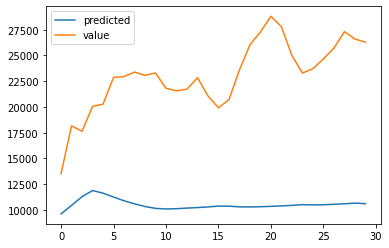

In [120]:
# plot lines
plt.plot(df_results.index.values, df_results["predicted"], label = "predicted")
plt.plot(df_results.index.values, df_results["value"], label = "value")
plt.legend()
plt.show()

In [121]:
timeseries_evaluation_metrics_func(df_results["value"], df_results["predicted"])

Evaluation metric results: 
MSE is : 167386349.97017664
MAE is : 12501.0060546875
RMSE is : 12937.787676808452
MAPE is : 53.1855380214305
R2 is : -14.534423850083657



CNN LSTM
( https://machinelearningmastery.com/cnn-long-short-term-memory-networks/ )

In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn import metrics
import tensorflow as tf
from sklearn import preprocessing
from keras.models import Sequential
from keras.layers import LSTM
from keras.layers import Dense
from numpy import array
import os
from google.colab import drive
drive.mount('/content/drive/')
path = "/content/drive/My Drive/data/realKnownCause/nyc_taxi.xlsx"
data_Taxi = pd.read_excel(path)
data_Taxi_forecasting = data_Taxi[["timestamp","value"]]
data_Taxi_forecasting.set_index('timestamp', inplace=True)

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


In [6]:
df_values = data_Taxi_forecasting["value"]
trainX, testX = time_train_test_split(df_values, test_size=30)

In [7]:
# split a univariate sequence into samples
def split_sequence(sequence, n_steps):
	X, y = list(), list()
	for i in range(len(sequence)):
		# find the end of this pattern
		end_ix = i + n_steps
		# check if we are beyond the sequence
		if end_ix > len(sequence)-1:
			break
		# gather input and output parts of the pattern
		seq_x, seq_y = sequence[i:end_ix], sequence[end_ix]
		X.append(seq_x)
		y.append(seq_y)
	return array(X), array(y)

In [8]:
# choose a number of time steps
n_steps = 8
# split into samples
X, y = split_sequence(trainX, n_steps)
# reshape from [samples, timesteps] into [samples, subsequences, timesteps, features]
n_features = 1
n_seq = 2
n_steps = 4
X = X.reshape((X.shape[0], n_seq, n_steps, n_features))

In [9]:
X.shape

(10282, 2, 4, 1)

In [10]:
# define model
from keras.layers import Flatten
from keras.layers import TimeDistributed
from keras.layers.convolutional import Conv1D
from keras.layers.convolutional import MaxPooling1D
model4 = Sequential()
model4.add(TimeDistributed(Conv1D(filters=64, kernel_size=1, activation='relu'), input_shape=(None, n_steps, n_features)))
model4.add(TimeDistributed(MaxPooling1D(pool_size=2)))
model4.add(TimeDistributed(Flatten()))
model4.add(LSTM(50, activation='relu'))
model4.add(Dense(1))
model4.compile(optimizer='adam', loss='mse')

In [11]:
model4.fit(X, y, epochs=100, verbose=1)

Epoch 1/100
322/322 [==============================] - 16s 14ms/step - loss: 23877904.0000
Epoch 2/100
322/322 [==============================] - 4s 14ms/step - loss: 6571545.0000
Epoch 3/100
322/322 [==============================] - 4s 14ms/step - loss: 3827867.7500
Epoch 4/100
322/322 [==============================] - 5s 14ms/step - loss: 3107356.2500
Epoch 5/100
322/322 [==============================] - 4s 14ms/step - loss: 3042838.0000
Epoch 6/100
322/322 [==============================] - 5s 14ms/step - loss: 2885354.2500
Epoch 7/100
322/322 [==============================] - 4s 14ms/step - loss: 2855277.5000
Epoch 8/100
322/322 [==============================] - 5s 15ms/step - loss: 2803768.2500
Epoch 9/100
322/322 [==============================] - 4s 14ms/step - loss: 2803922.0000
Epoch 10/100
322/322 [==============================] - 4s 13ms/step - loss: 2588483.2500
Epoch 11/100
322/322 [==============================] - 7s 21ms/step - loss: 2595471.7500
Epoch 12/100
322/

In [12]:
x_input = X[-1]
x_input

array([[[5209],
        [3683],
        [3329],
        [3714]],

       [[4531],
        [4803],
        [7049],
        [8363]]])

In [13]:
input_sample = []
for i in x_input:
  print(i)
  for j in range(0,len(i)):
   input_sample.append(i[j][0])

[[5209]
 [3683]
 [3329]
 [3714]]
[[4531]
 [4803]
 [7049]
 [8363]]


In [14]:
print(input_sample)

[5209, 3683, 3329, 3714, 4531, 4803, 7049, 8363]


In [15]:
# demonstrate prediction for next 10 days
#x_input = array(x_input)
temp_input= input_sample   #list(x_input)
print(len(temp_input))
lst_output=[]
i=0
while(i<30):
    
    if(len(temp_input)>8):
        x_input=array(temp_input[1:])
        print("{} day input {}".format(i,x_input))
        #print(x_input)
        x_input = x_input.reshape((1, n_seq, n_steps, n_features))
        #print(x_input)
        yhat = model4.predict(x_input, verbose=0)
        print("{} day output {}".format(i,yhat))
        temp_input.append(yhat[0][0])
        temp_input=temp_input[1:]
        #print(temp_input)
        lst_output.append(yhat[0][0])
        i=i+1
    else:
        print(x_input)
        x_input = x_input.reshape((1, n_seq, n_steps, n_features))
        yhat = model4.predict(x_input, verbose=0)
        print(yhat[0])
        temp_input.append(yhat[0][0])
        lst_output.append(yhat[0][0])
        i=i+1
    

print(lst_output)

8
[[[5209]
  [3683]
  [3329]
  [3714]]

 [[4531]
  [4803]
  [7049]
  [8363]]]
[10753.315]
1 day input [ 3683.          3329.          3714.          4531.
  4803.          7049.          8363.         10753.31542969]
1 day output [[11834.488]]
2 day input [ 3329.          3714.          4531.          4803.
  7049.          8363.         10753.31542969 11834.48828125]
2 day output [[12621.059]]
3 day input [ 3714.          4531.          4803.          7049.
  8363.         10753.31542969 11834.48828125 12621.05859375]
3 day output [[12860.574]]
4 day input [ 4531.          4803.          7049.          8363.
 10753.31542969 11834.48828125 12621.05859375 12860.57421875]
4 day output [[12272.267]]
5 day input [ 4803.          7049.          8363.         10753.31542969
 11834.48828125 12621.05859375 12860.57421875 12272.26660156]
5 day output [[11890.394]]
6 day input [ 7049.          8363.         10753.31542969 11834.48828125
 12621.05859375 12860.57421875 12272.26660156 11890.3935546

In [16]:
df_results = pd.DataFrame(testX)
df_results["predicted"] = lst_output
df_results["new_index"]= range(0, len(testX))
df_results = df_results.set_index("new_index")


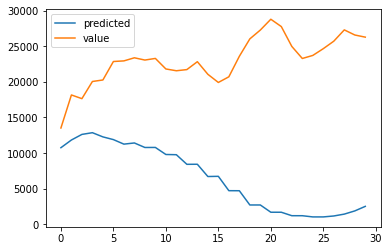

In [17]:
# plot lines
plt.plot(df_results.index.values, df_results["predicted"], label = "predicted")
plt.plot(df_results.index.values, df_results["value"], label = "value")
plt.legend()
plt.show()

In [21]:
timeseries_evaluation_metrics_func(df_results["value"], df_results["predicted"])

Evaluation metric results: 
MSE is : 323412720.6193072
MAE is : 16501.811169433593
RMSE is : 17983.679284821203
MAPE is : 68.84165062391037
R2 is : -29.01457574948103



Conv LSTM

In [22]:
# choose a number of time steps
n_steps = 8
# split into samples
X, y = split_sequence(trainX, n_steps)
# reshape from [samples, timesteps] into [samples, subsequences, timesteps, features]
n_features = 1
n_seq = 2
n_steps = 4
X = X.reshape((X.shape[0], n_seq, 1, n_steps, n_features))

In [23]:
from keras.layers import ConvLSTM2D
from keras.layers import LSTM
from keras.layers import Dense
from keras.layers import Flatten
# define model
model5 = Sequential()
model5.add(ConvLSTM2D(filters=64, kernel_size=(1,2), activation='relu', input_shape=(n_seq, 1, n_steps, n_features)))
model5.add(Flatten())
model5.add(Dense(1))
model5.compile(optimizer='adam', loss='mse')

In [24]:
model5.fit(X, y, epochs=100, verbose=1)

Epoch 1/100
322/322 [==============================] - 15s 36ms/step - loss: 32478828.0000
Epoch 2/100
322/322 [==============================] - 20s 63ms/step - loss: 7187321.5000
Epoch 3/100
322/322 [==============================] - 11s 33ms/step - loss: 5400274.5000
Epoch 4/100
322/322 [==============================] - 11s 33ms/step - loss: 4057112.2500
Epoch 5/100
322/322 [==============================] - 10s 32ms/step - loss: 3150930.7500
Epoch 6/100
322/322 [==============================] - 11s 33ms/step - loss: 2524031.2500
Epoch 7/100
322/322 [==============================] - 11s 34ms/step - loss: 2021927.0000
Epoch 8/100
322/322 [==============================] - 11s 33ms/step - loss: 1907605.3750
Epoch 9/100
322/322 [==============================] - 11s 34ms/step - loss: 1710233.3750
Epoch 10/100
322/322 [==============================] - 11s 33ms/step - loss: 1616969.7500
Epoch 11/100
322/322 [==============================] - 11s 34ms/step - loss: 1795760.6250
Epoch 1

In [25]:
x_input = X[-1]
x_input

array([[[[5209],
         [3683],
         [3329],
         [3714]]],


       [[[4531],
         [4803],
         [7049],
         [8363]]]])

In [26]:
input_sample = []
for i in x_input:
  #print(len(i[0]))
  for j in range(0,len(i[0])):
    print(i[0][j])
    input_sample.append(i[0][j][0])

    #for k in range(0, len(j)):
      #input_sample.append(i[j][k][0])

   #input_sample.append(i[j])

[5209]
[3683]
[3329]
[3714]
[4531]
[4803]
[7049]
[8363]


In [27]:
input_sample

[5209, 3683, 3329, 3714, 4531, 4803, 7049, 8363]

In [28]:
# demonstrate prediction for next 10 days
#x_input = array(x_input)
temp_input= input_sample   #list(x_input)
print(len(temp_input))
lst_output=[]
i=0
while(i<30):
    
    if(len(temp_input)>8):
        x_input=array(temp_input[1:])
        print("{} day input {}".format(i,x_input))
        #print(x_input)
        x_input = x_input.reshape((1, n_seq, 1, n_steps, n_features))
        #print(x_input)
        yhat = model5.predict(x_input, verbose=0)
        print("{} day output {}".format(i,yhat))
        temp_input.append(yhat[0][0])
        temp_input=temp_input[1:]
        #print(temp_input)
        lst_output.append(yhat[0][0])
        i=i+1
    else:
        print(x_input)
        x_input = x_input.reshape((1, n_seq, 1, n_steps, n_features))
        yhat = model5.predict(x_input, verbose=0)
        print(yhat[0])
        temp_input.append(yhat[0][0])
        lst_output.append(yhat[0][0])
        i=i+1
    

print(lst_output)

8
[[[[5209]
   [3683]
   [3329]
   [3714]]]


 [[[4531]
   [4803]
   [7049]
   [8363]]]]
[10450.716]
1 day input [ 3683.          3329.          3714.          4531.
  4803.          7049.          8363.         10450.71582031]
1 day output [[11821.012]]
2 day input [ 3329.          3714.          4531.          4803.
  7049.          8363.         10450.71582031 11821.01171875]
2 day output [[14166.296]]
3 day input [ 3714.          4531.          4803.          7049.
  8363.         10450.71582031 11821.01171875 14166.29589844]
3 day output [[14603.825]]
4 day input [ 4531.          4803.          7049.          8363.
 10450.71582031 11821.01171875 14166.29589844 14603.82519531]
4 day output [[15670.474]]
5 day input [ 4803.          7049.          8363.         10450.71582031
 11821.01171875 14166.29589844 14603.82519531 15670.47363281]
5 day output [[15402.511]]
6 day input [ 7049.          8363.         10450.71582031 11821.01171875
 14166.29589844 14603.82519531 15670.47363281 15

In [29]:
df_results = pd.DataFrame(testX)
df_results["predicted"] = lst_output
df_results["new_index"]= range(0, len(testX))
df_results = df_results.set_index("new_index")

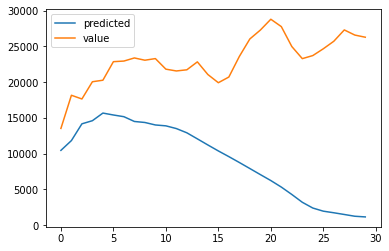

In [30]:
# plot lines
plt.plot(df_results.index.values, df_results["predicted"], label = "predicted")
plt.plot(df_results.index.values, df_results["value"], label = "value")
plt.legend()
plt.show()

In [31]:
timeseries_evaluation_metrics_func(df_results["value"], df_results["predicted"])

Evaluation metric results: 
MSE is : 246710849.32782945
MAE is : 13823.39901936849
RMSE is : 15707.031843344224
MAPE is : 57.18961802118273
R2 is : -21.8961973455749



**Facebook Prophet**

In [32]:
import pandas as pd
import matplotlib.pyplot as plt
from fbprophet import Prophet

In [33]:
path = "/content/drive/My Drive/data/realKnownCause/nyc_taxi.xlsx"
data_Taxi = pd.read_excel(path)

In [34]:
data_Taxi_forecasting = data_Taxi[["timestamp","value"]]

In [35]:
data_Taxi_forecasting = data_Taxi_forecasting.rename(columns={"timestamp": "ds", "value": "y"})

In [36]:
len(data_Taxi_forecasting)

10320

In [7]:
#data_Taxi_forecasting.set_index('ds', inplace=True)

In [8]:
#df_values = data_Taxi_forecasting["value"]
#trainX, testX = time_train_test_split(data_Taxi_forecasting, test_size=30)

In [37]:
trainX = data_Taxi_forecasting.iloc[:-30 , :]
testX = data_Taxi_forecasting.tail(30)

In [38]:
trainX

,ds,y
0,2014-07-01 00:00:00,10844
1,2014-07-01 00:30:00,8127
2,2014-07-01 01:00:00,6210
3,2014-07-01 01:30:00,4656
4,2014-07-01 02:00:00,3820
...,...,...
10285,2015-01-31 06:30:00,4531
10286,2015-01-31 07:00:00,4803
10287,2015-01-31 07:30:00,7049
10288,2015-01-31 08:00:00,8363


In [ ]:
dir(Prophet)

In [40]:
# Model fit
m = Prophet() #Instanticate from Prophet class. 
m.fit(trainX) # Fit the Prophet model.


INFO:numexpr.utils:NumExpr defaulting to 2 threads.
INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.


In [ ]:
m.component_modes

In [42]:
# Predict
future = m.make_future_dataframe(periods=30) # Make future date data frame for the next 365 days (it gives daily because it follows the frequency in input dataframe by default).
forecast = m.predict(future) # Predict future value.

In [43]:
forecast.head()


,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,daily,daily_lower,daily_upper,weekly,weekly_lower,weekly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2014-07-01 00:00:00,14105.659078,8390.086146,17753.215671,14105.659078,14105.659078,-876.793376,-876.793376,-876.793376,575.719679,575.719679,575.719679,-1452.513056,-1452.513056,-1452.513056,0.0,0.0,0.0,13228.865702
1,2014-07-01 00:30:00,14107.023889,7193.533251,16778.661520,14107.023889,14107.023889,-2221.911971,-2221.911971,-2221.911971,-813.290505,-813.290505,-813.290505,-1408.621465,-1408.621465,-1408.621465,0.0,0.0,0.0,11885.111918
2,2014-07-01 01:00:00,14108.388700,5467.019208,15292.229990,14108.388700,14108.388700,-3732.044658,-3732.044658,-3732.044658,-2366.700647,-2366.700647,-2366.700647,-1365.344011,-1365.344011,-1365.344011,0.0,0.0,0.0,10376.344042
3,2014-07-01 01:30:00,14109.753510,4034.627794,13321.646059,14109.753510,14109.753510,-5421.026746,-5421.026746,-5421.026746,-4098.279139,-4098.279139,-4098.279139,-1322.747607,-1322.747607,-1322.747607,0.0,0.0,0.0,8688.726765
4,2014-07-01 02:00:00,14111.118321,2063.796986,11559.833316,14111.118321,14111.118321,-7240.281077,-7240.281077,-7240.281077,-5959.386157,-5959.386157,-5959.386157,-1280.894920,-1280.894920,-1280.894920,0.0,0.0,0.0,6870.837244


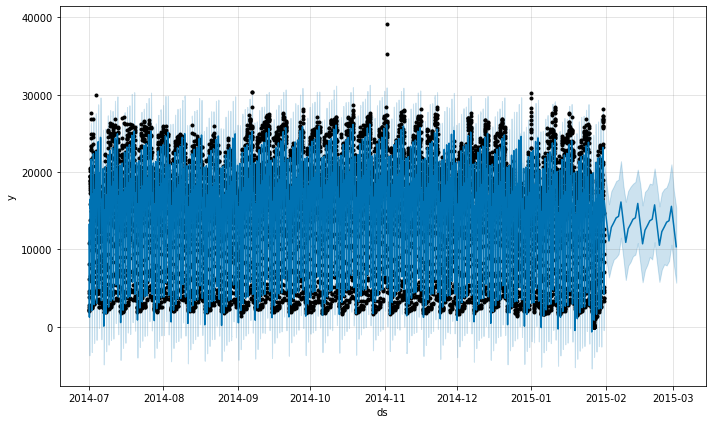

In [44]:
m.plot(forecast);

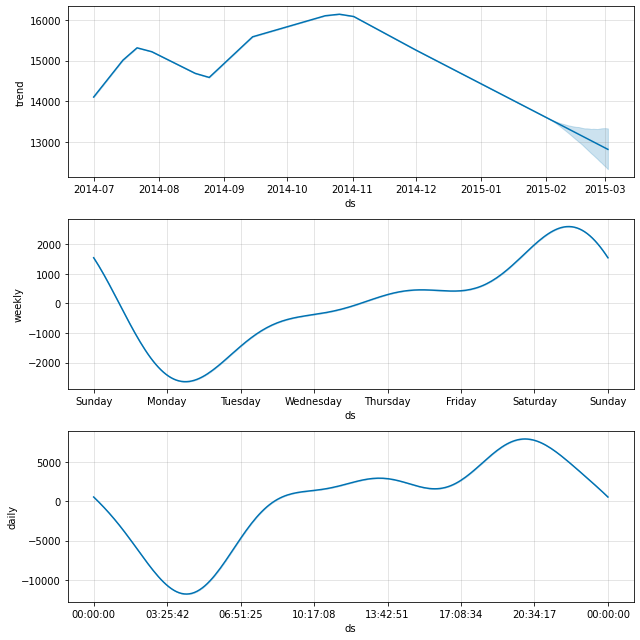

In [45]:
m.plot_components(forecast);

In [46]:
df_res = pd.DataFrame(columns=['Predicted','Actual'])

In [47]:
df_res['Actual']= testX["y"]

In [ ]:
forecast["yhat"].tail(30)

In [49]:
df_res['Predicted'] = forecast["yhat"].tail(30)

In [50]:
df_res["new_index"]= range(0, len(testX))

In [51]:
df_res = df_res.set_index("new_index")

In [ ]:
df_res

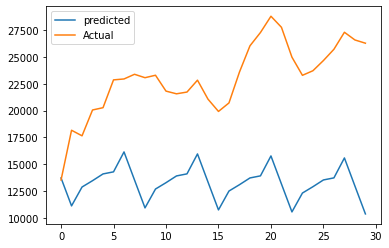

In [53]:
# plot lines
plt.plot(df_res.index.values, df_res["Predicted"], label = "predicted")
plt.plot(df_res.index.values, df_res["Actual"], label = "Actual")
plt.legend()
plt.show()

In [54]:
timeseries_evaluation_metrics_func(df_res['Actual'], df_res['Predicted'])

Evaluation metric results: 
MSE is : 106614574.45895118
MAE is : 9775.54006911784
RMSE is : 10325.433378747412
MAPE is : 41.23136826357284
R2 is : -8.894450703637046

